Loading all_augustinus_grant.csv into dataframe AUGUSTINUS
Loading bii_24_sep.csv into dataframe BII
Loading bikubben_data.csv into dataframe BIKUBBEN
Loading bitten_o_madsen.csv into dataframe BOM
Loading carlsberg_data-Copy1.csv into dataframe CARLSBERG
Loading csv_nordea-Copy1.csv into dataframe NORDEA
Loading villum_rawdata.csv into dataframe VILLUM
Loading combined_data_lego.csv into dataframe LEGO
Loading egmont_data.csv into dataframe EGMONT
Loading fmba.csv into dataframe FMBA
Loading leo_data.csv into dataframe LEO
Loading lundbeck_data.csv into dataframe LUNDBECK
Loading novo_data_24th_sep.csv into dataframe NOVO
Loading obelsk_data.csv into dataframe OBELSKE
Loading poul_due_jensen2.csv into dataframe PDJ
Loading salling_data.csv into dataframe SALLING
Loading trygfonden_data-Copy1.csv into dataframe TRYGFONDEN
Loading velux_data.csv into dataframe VELUX
Number of foundations in the dataset : 18


/var/folders/cn/n534_4n13g5gcvffdw0b21mh0000gn/T/ipykernel_31707/3710451211.py:548: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframes["NOVO"]["Grant size (DKK)"] = dataframes["NOVO"]["Grant size (DKK)"].str.replace(".", "")
/var/folders/cn/n534_4n13g5gcvffdw0b21mh0000gn/T/ipykernel_31707/3710451211.py:554: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframes["OBELSKE"]["Grant size (DKK)"] = dataframes["OBELSKE"]["Grant size (DKK)"].str.replace(".", "")
/var/folders/cn/n534_4n13g5gcvffdw0b21mh0000gn/T/ipykernel_31707/3710451211.py:569: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular 

the columns in the dataset are:  ['Country' 'Description' 'Grant size (DKK)' 'Institution'
 'Project Category' 'Project Subcategory' 'Receiver' 'Receiver + Title'
 'Receiver Name' 'Receiver Profession' 'Region' 'Title'
 'Translated Description' 'Year']


AUGUSTINUS: 6325 rows
BII: 191 rows
BIKUBBEN: 1163 rows
BOM: 179 rows
CARLSBERG: 2349 rows
NORDEA: 3323 rows
VILLUM: 2420 rows
LEGO: 381 rows
EGMONT: 174 rows
FMBA: 183 rows
LEO: 330 rows
LUNDBECK: 3308 rows
NOVO: 7180 rows
OBELSKE: 688 rows
PDJ: 533 rows
SALLING: 207 rows
TRYGFONDEN: 7200 rows
VELUX: 1436 rows
Total rows across all dataframes: 37570
([number of rows],[number of columns]) : 
(37570, 15)


First 5 lines of full combined dataset : 

Number of lines kept : 37380
Number of lines removed : 190
AUGUSTINUS
3826 200000
200000
LEO
16693  EUR 25000
LEO
16694  EUR 25000
LEO
16741  AUD 268239
LEO
16742  AUD 415386
LEO
16751  AUD 268239
LEO
16752  AUD 415386
LEO
16761  AUD 268239
LEO
16762  AUD 415386
LEO
16771  AUD 268239
LEO
1677

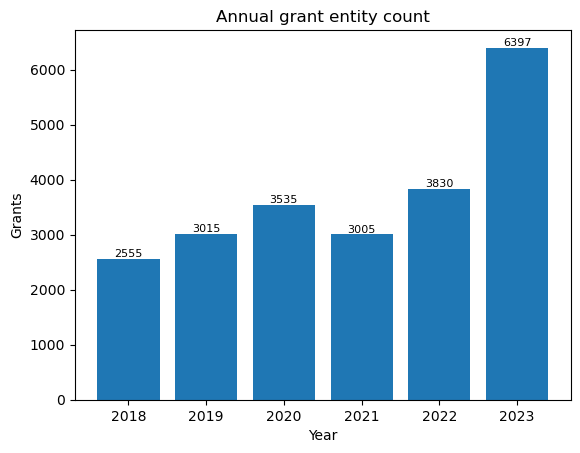

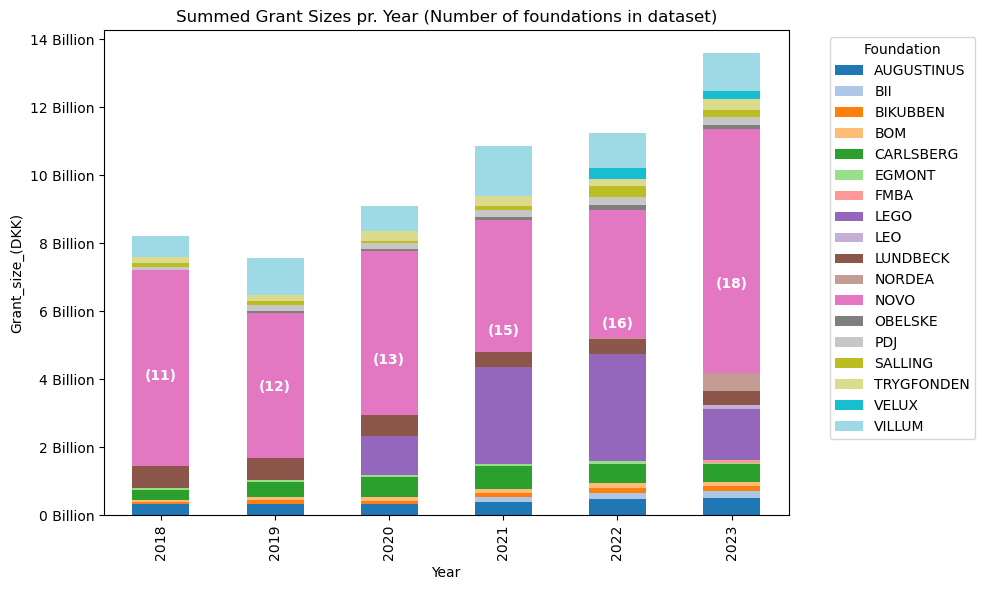

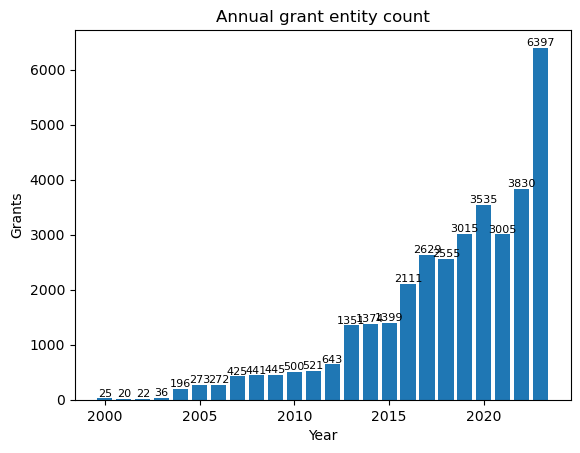

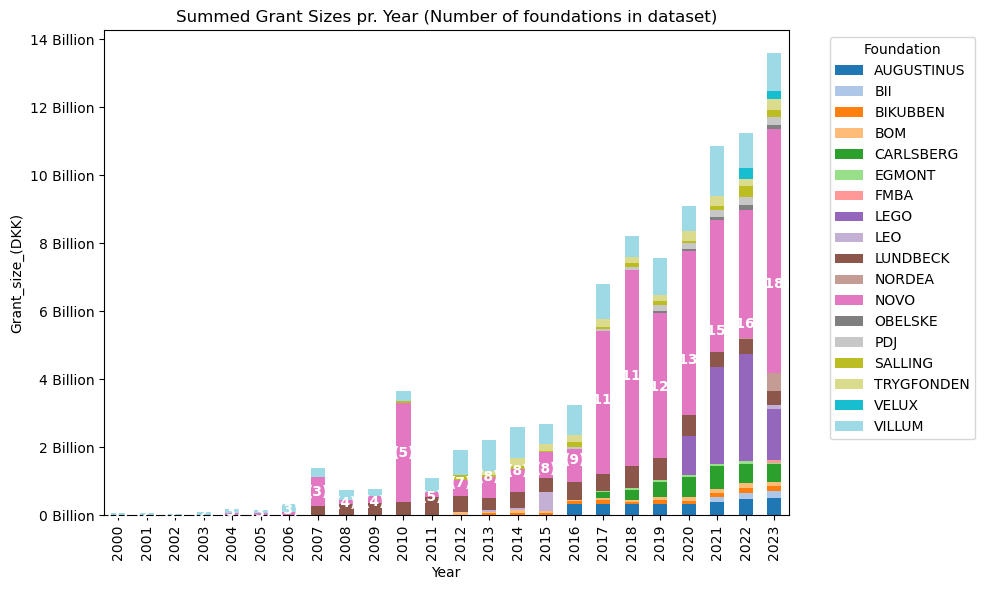

When keeping the number of foundations in the dataset constant since 2018, these foundations are included : ['AUGUSTINUS', 'BIKUBBEN', 'BOM', 'CARLSBERG', 'EGMONT', 'LUNDBECK', 'NOVO', 'PDJ', 'SALLING', 'TRYGFONDEN', 'VILLUM']


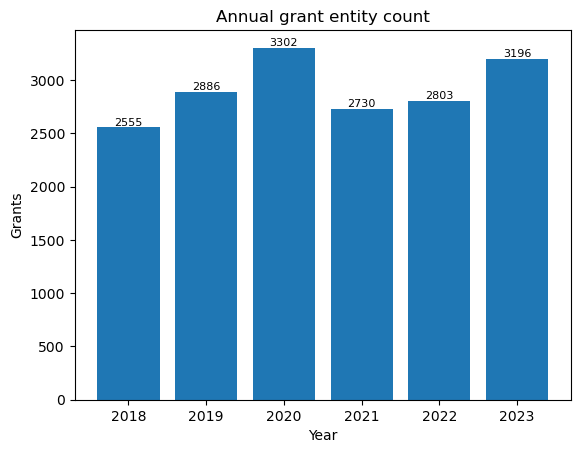

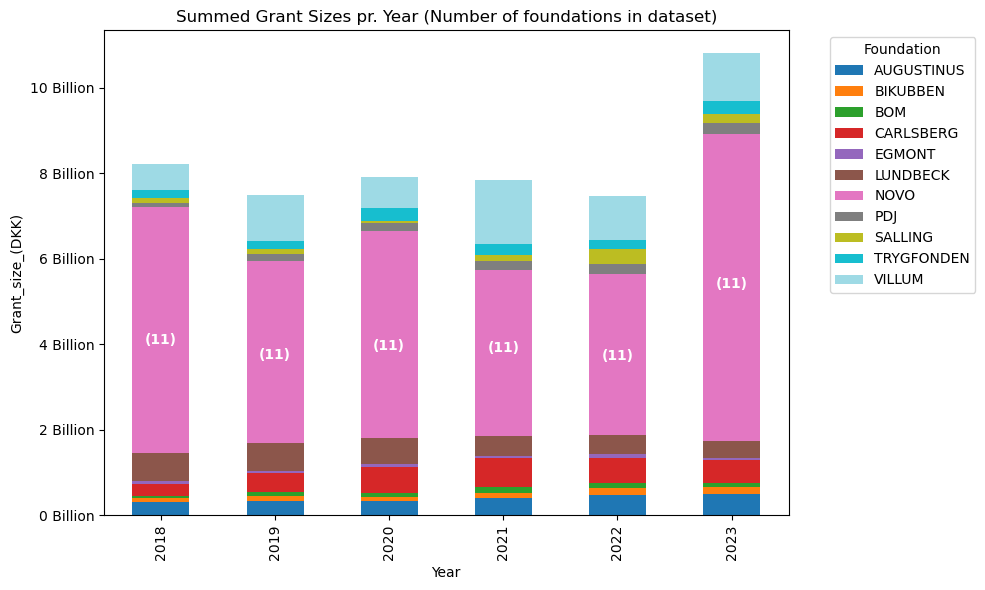

When keeping the number of foundations in the dataset constant since 2018, these foundations are included : ['AUGUSTINUS', 'BIKUBBEN', 'BOM', 'CARLSBERG', 'EGMONT', 'LEGO', 'LUNDBECK', 'NOVO', 'OBELSKE', 'PDJ', 'SALLING', 'TRYGFONDEN', 'VILLUM']


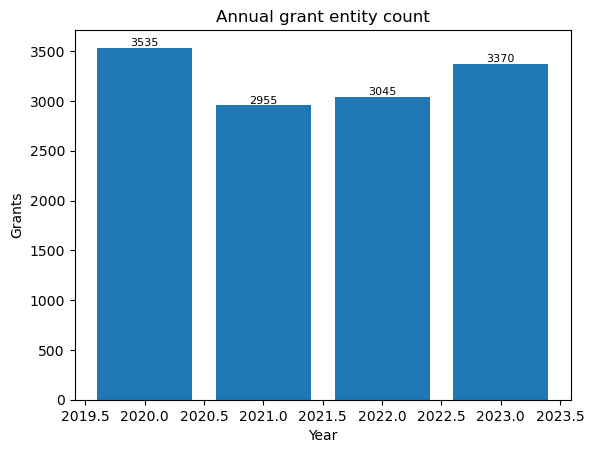

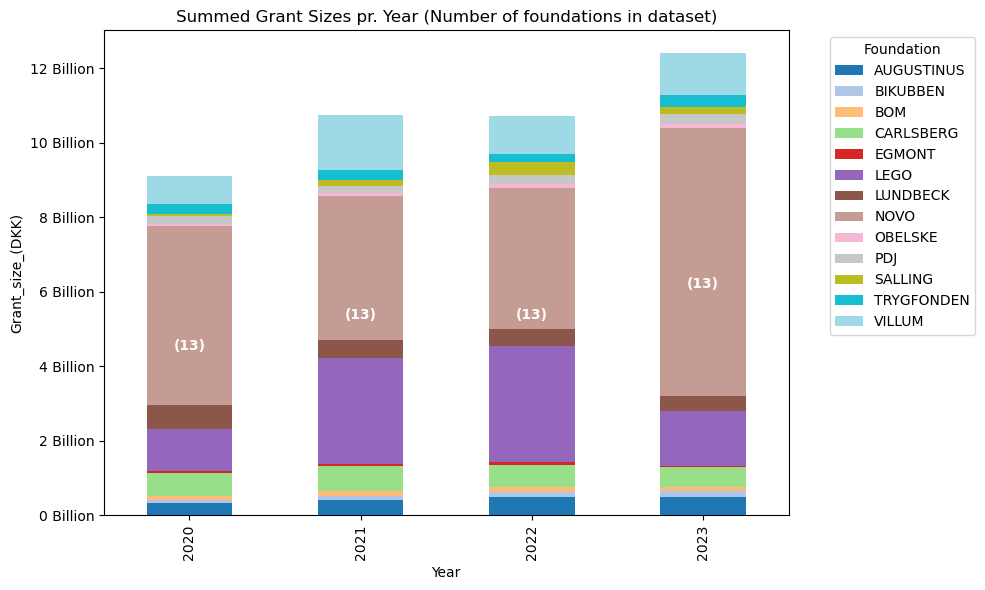

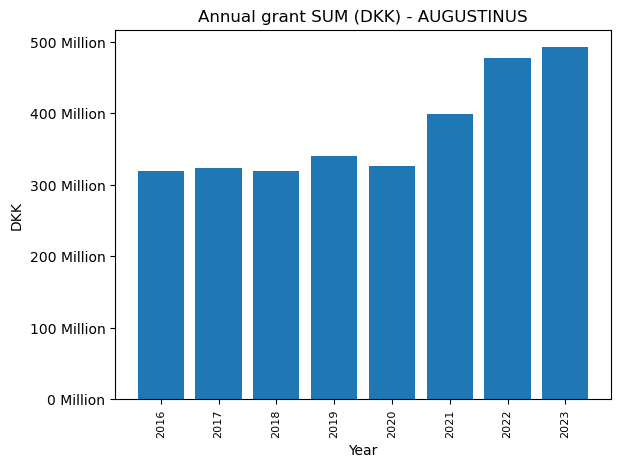

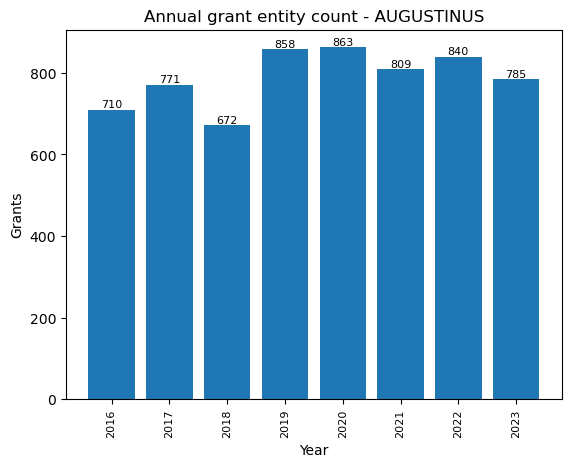

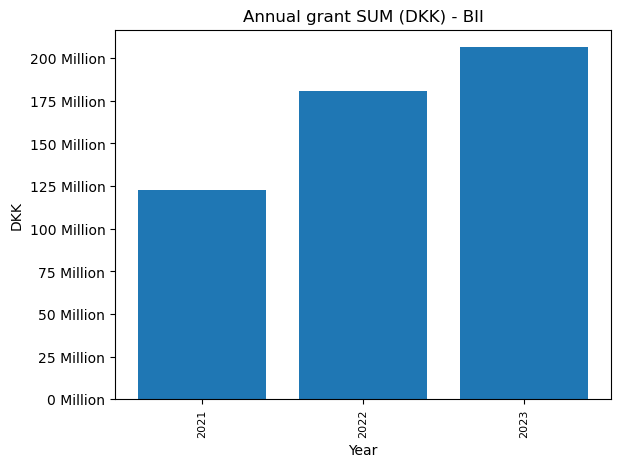

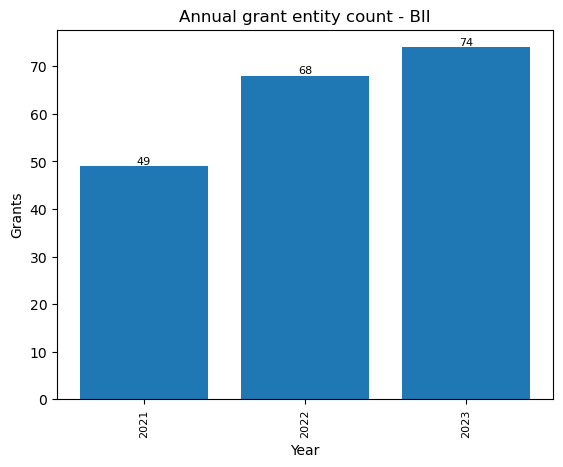

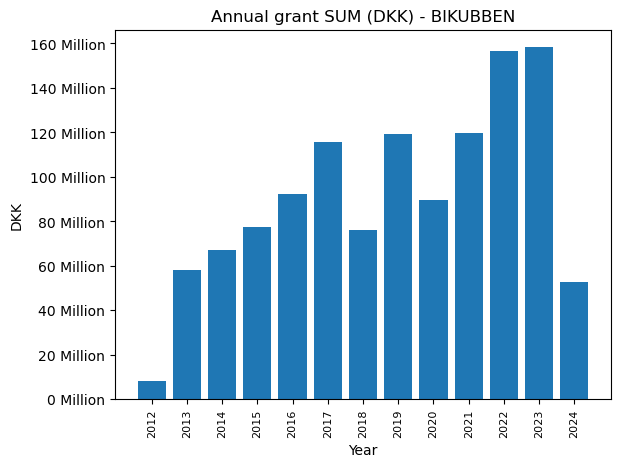

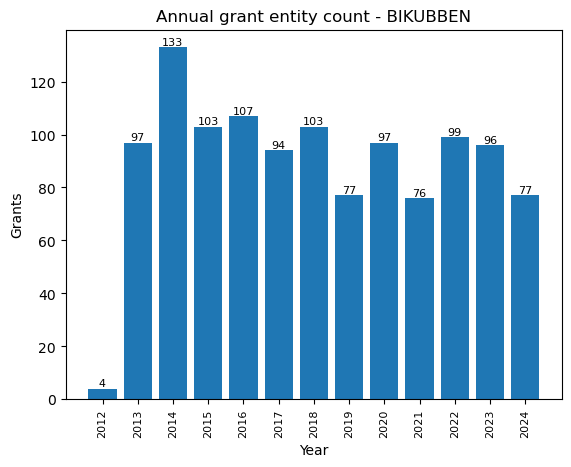

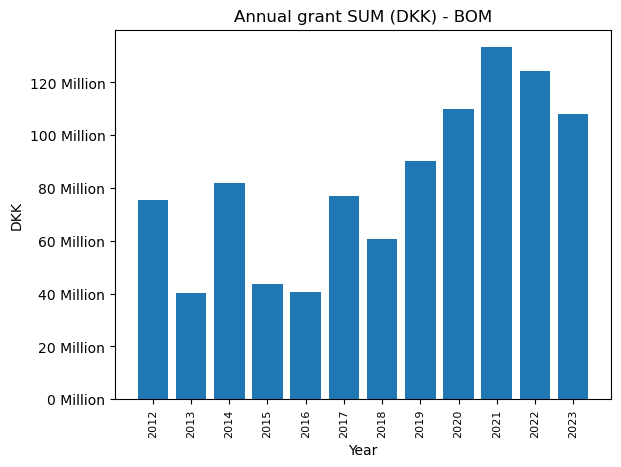

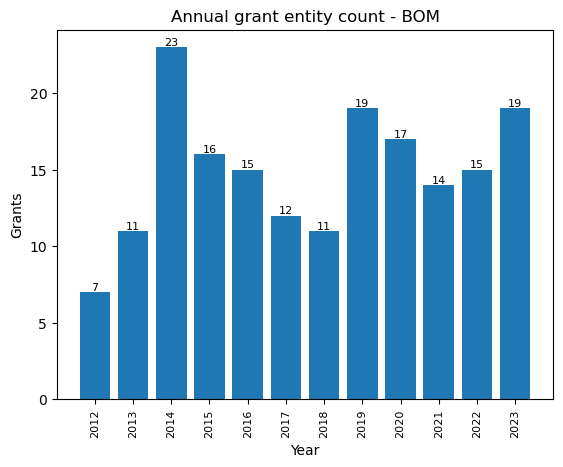

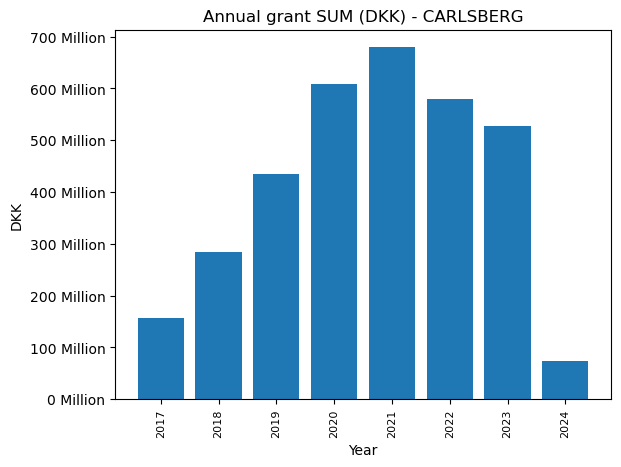

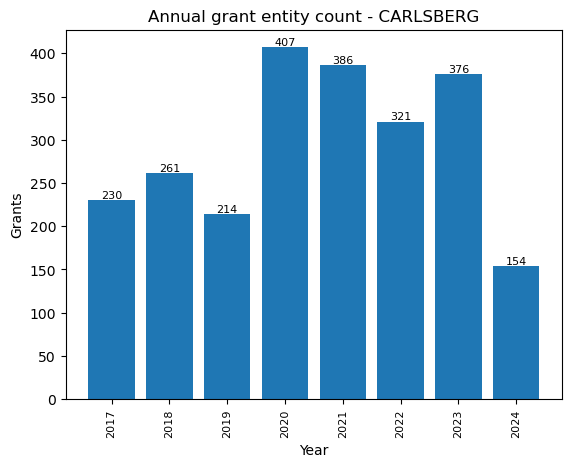

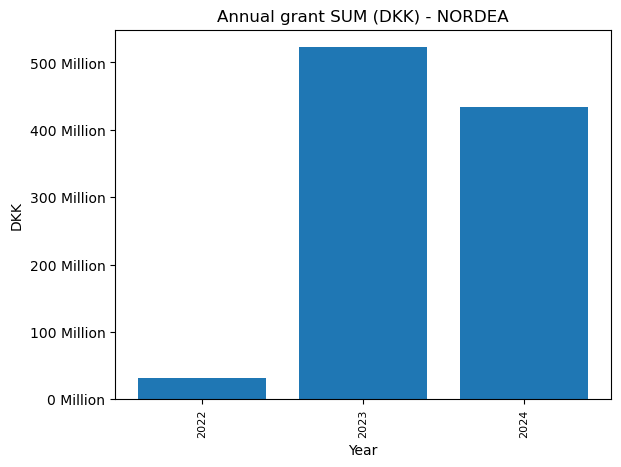

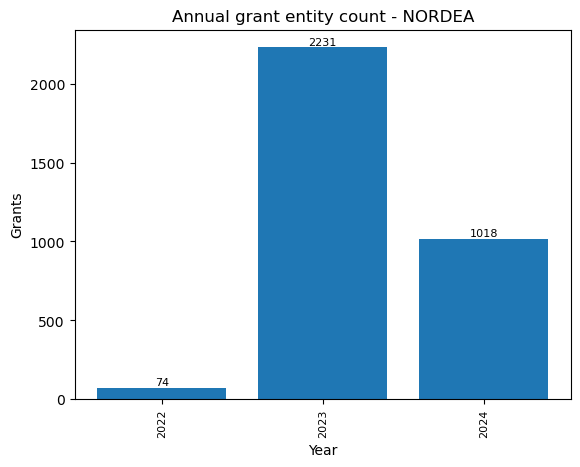

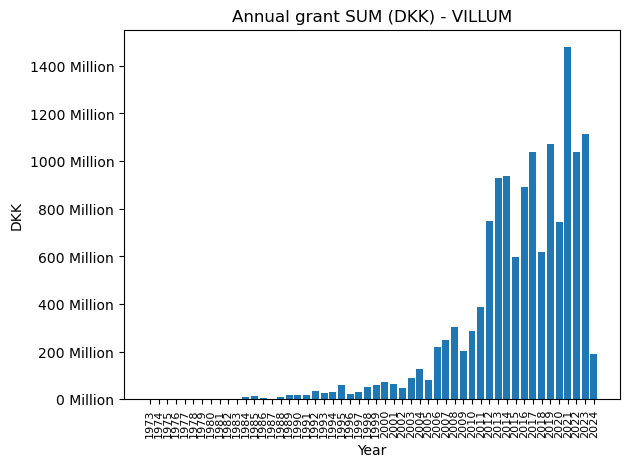

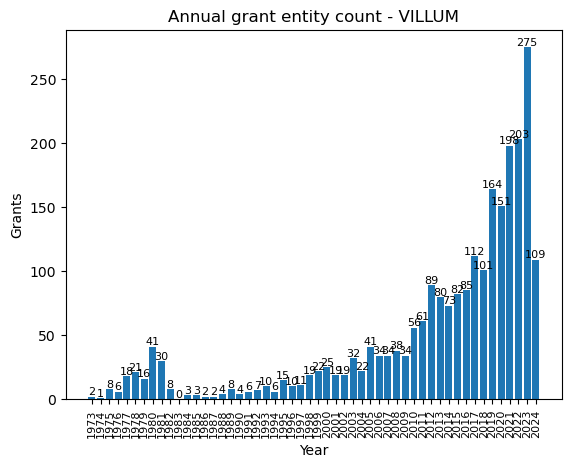

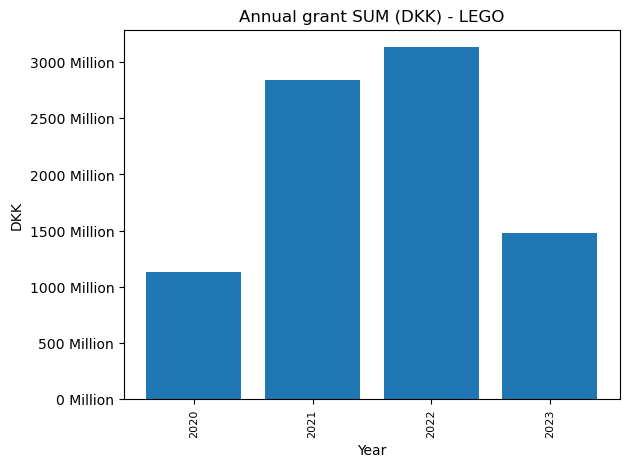

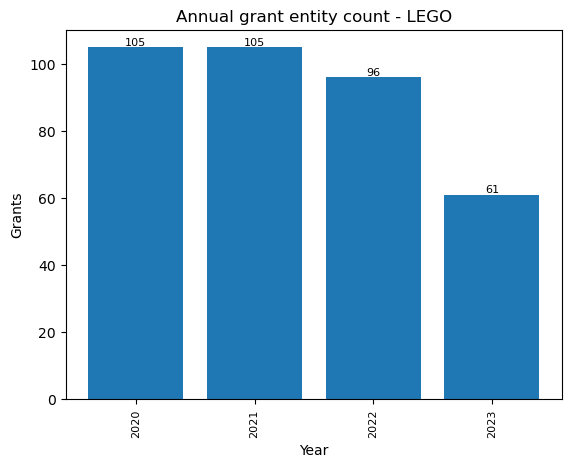

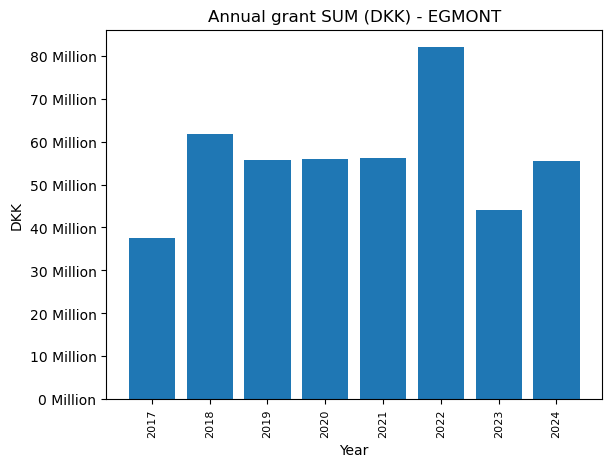

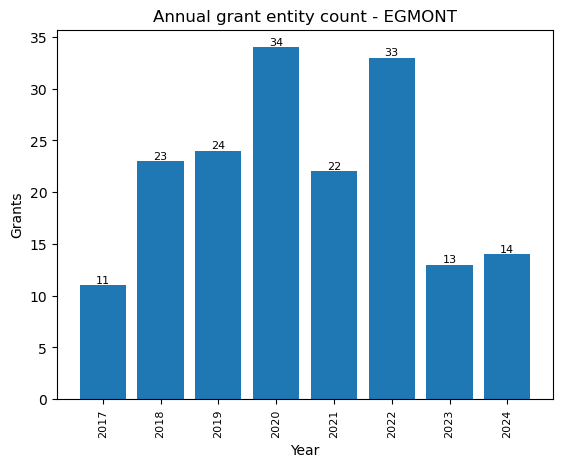

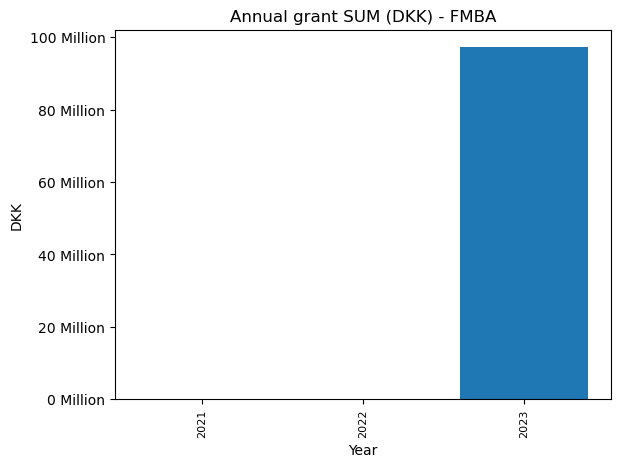

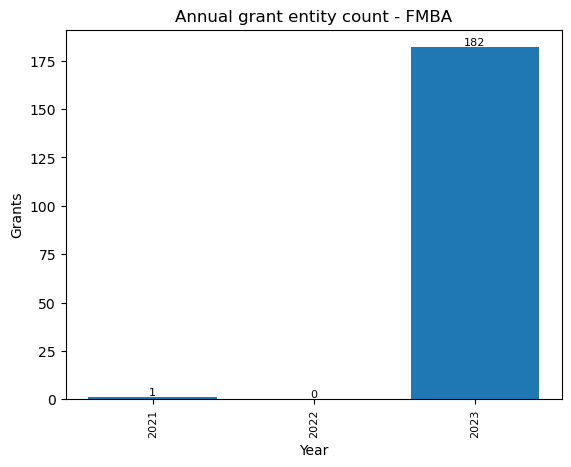

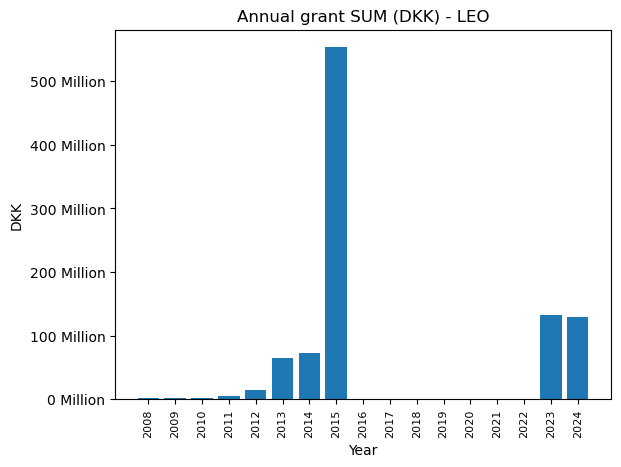

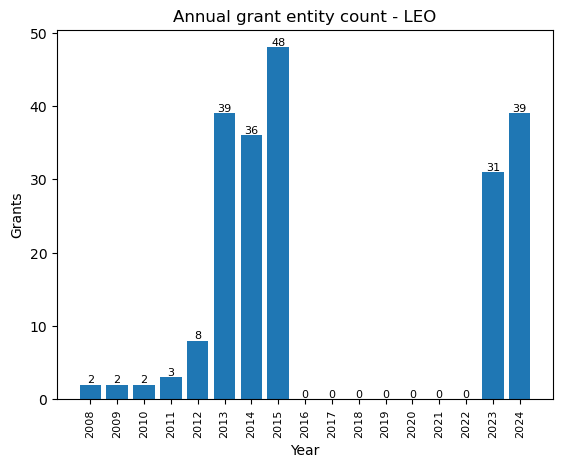

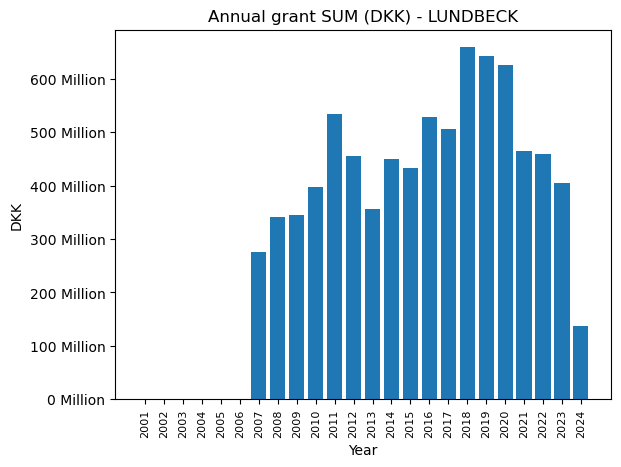

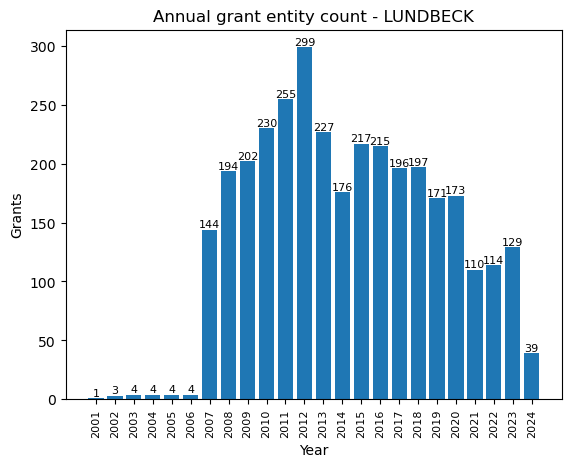

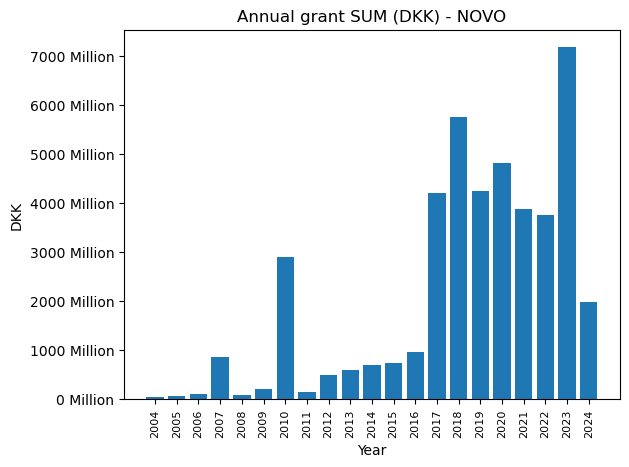

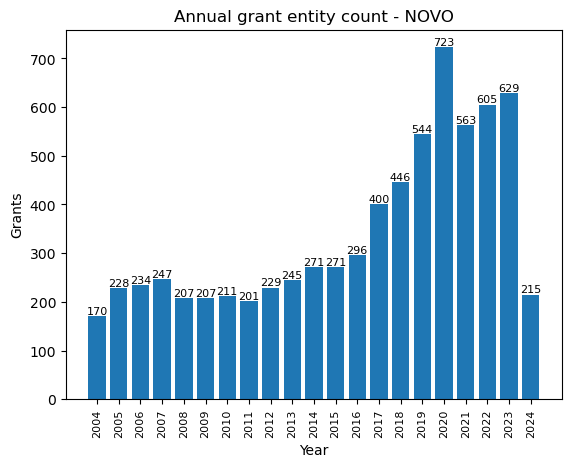

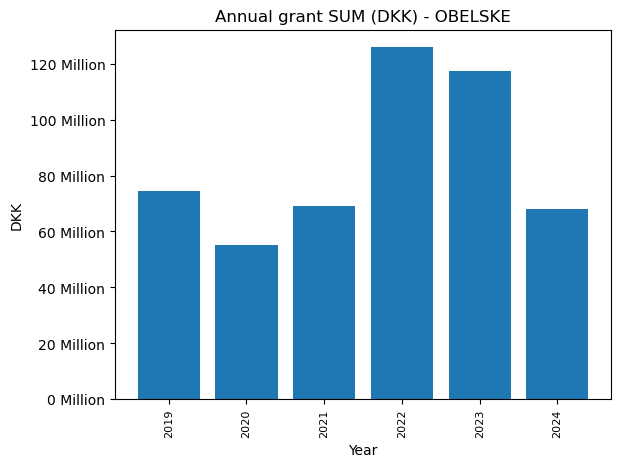

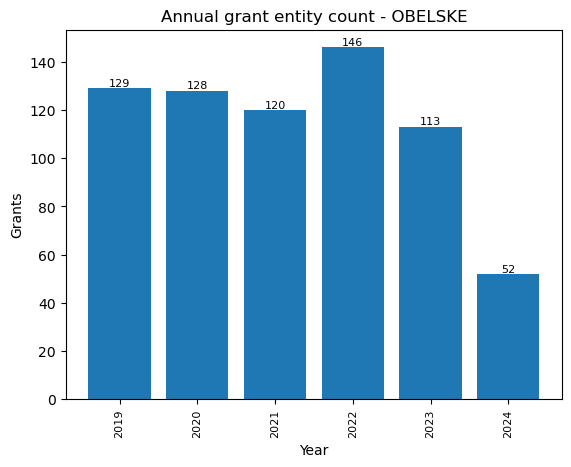

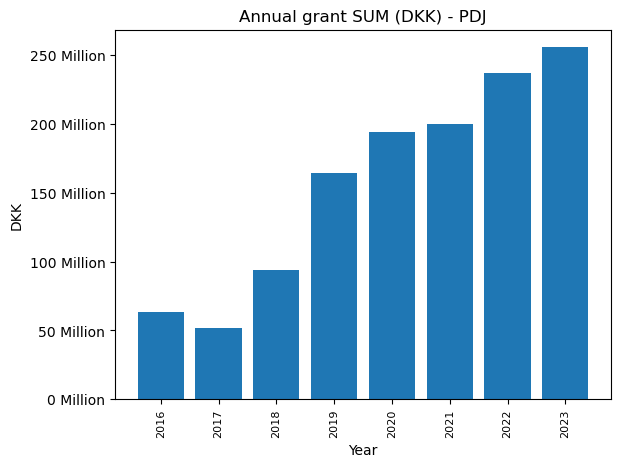

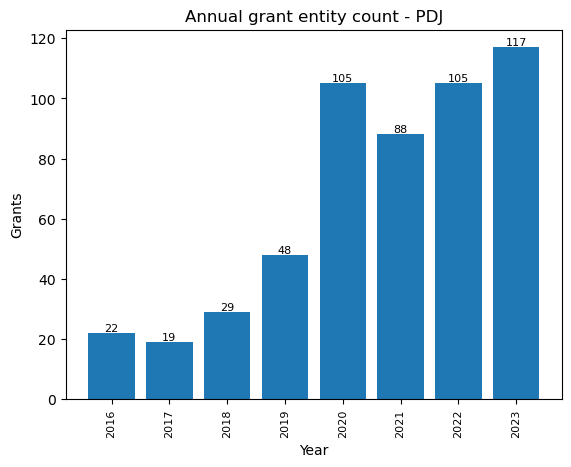

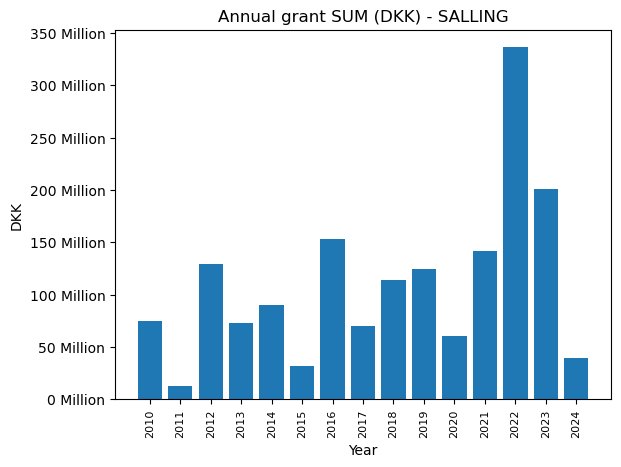

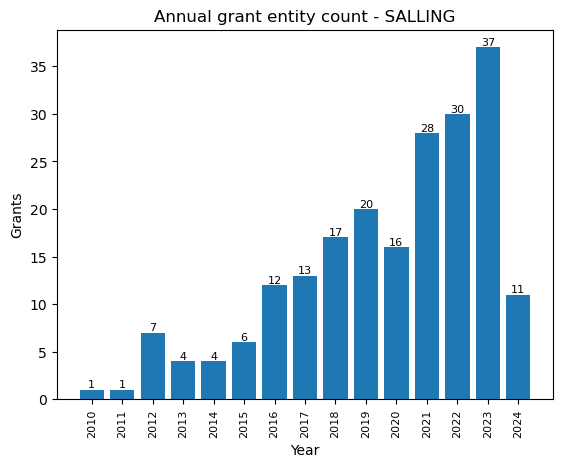

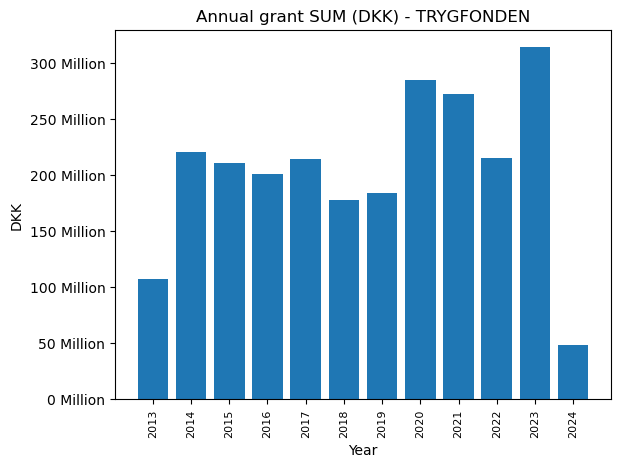

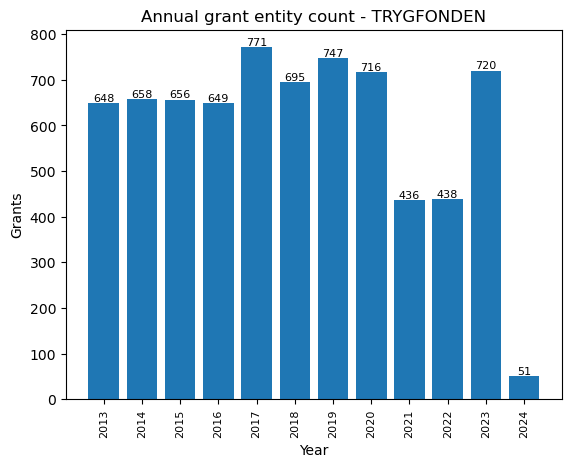

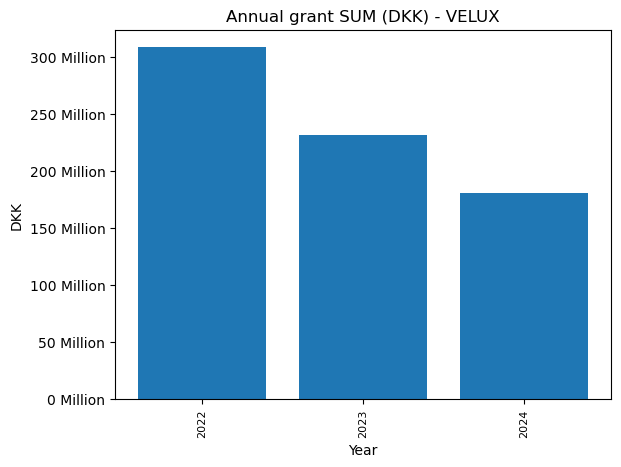

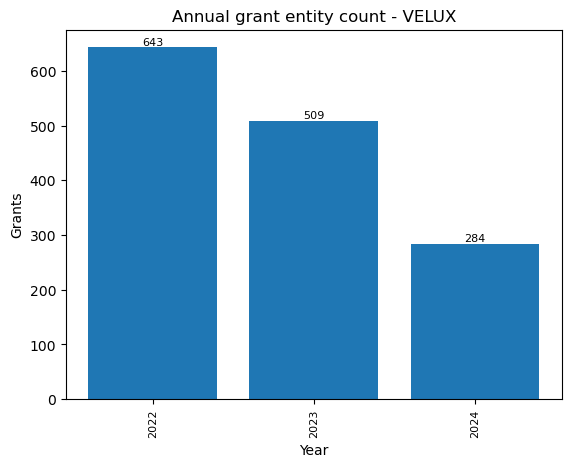

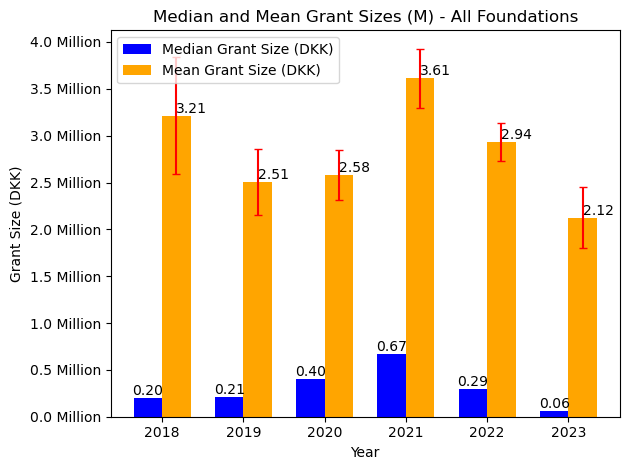

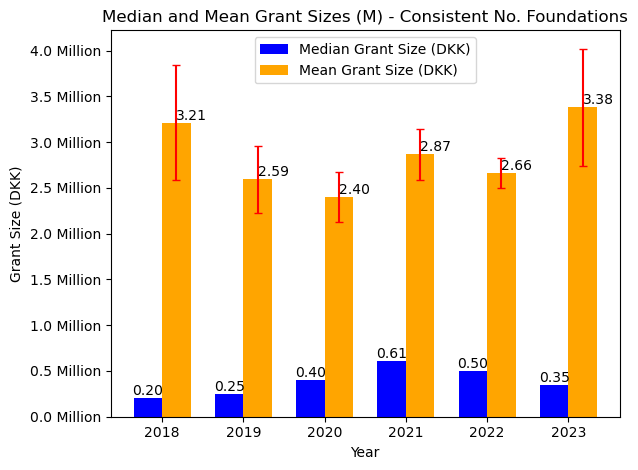

outliers removed from df with all funds since 2018
2018 - Upper Bound: 3372148.75, Outliers removed Count: 286
2019 - Upper Bound: 3793975.0, Outliers removed Count: 358
2020 - Upper Bound: 4910000.0, Outliers removed Count: 410
2021 - Upper Bound: 5962500.0, Outliers removed Count: 355
2022 - Upper Bound: 4940000.0, Outliers removed Count: 492
2023 - Upper Bound: 2280597.5, Outliers removed Count: 966
outliers removed from df with constant fund number since 2018
2018 - Upper Bound: 3372148.75, Outliers removed Count: 286
2019 - Upper Bound: 3946731.25, Outliers removed Count: 343
2020 - Upper Bound: 4860097.5, Outliers removed Count: 365
2021 - Upper Bound: 5130822.5, Outliers removed Count: 289
2022 - Upper Bound: 6150112.5, Outliers removed Count: 249
2023 - Upper Bound: 4913000.0, Outliers removed Count: 393


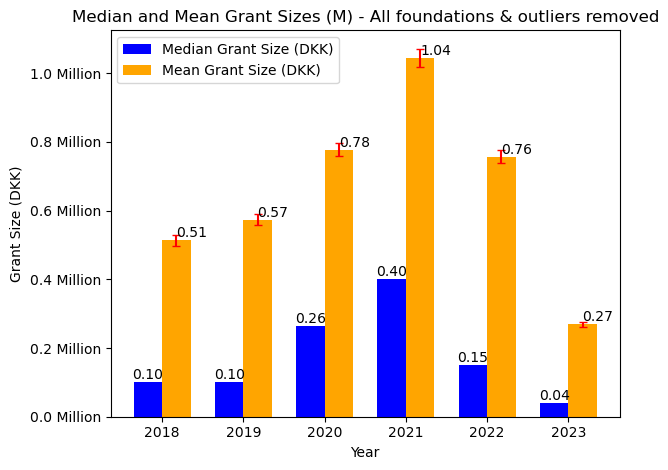

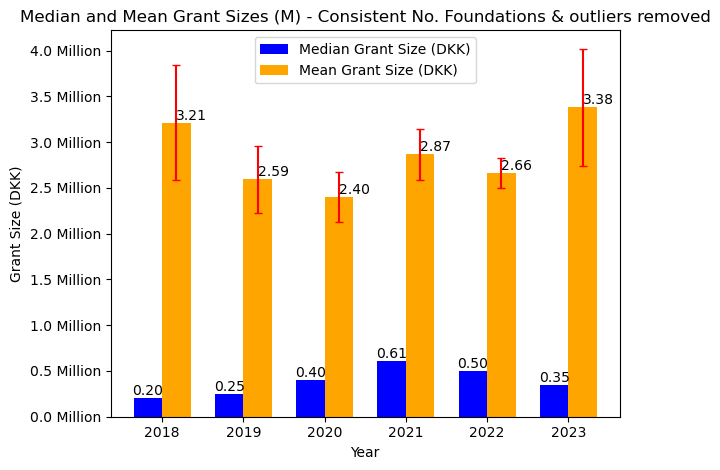

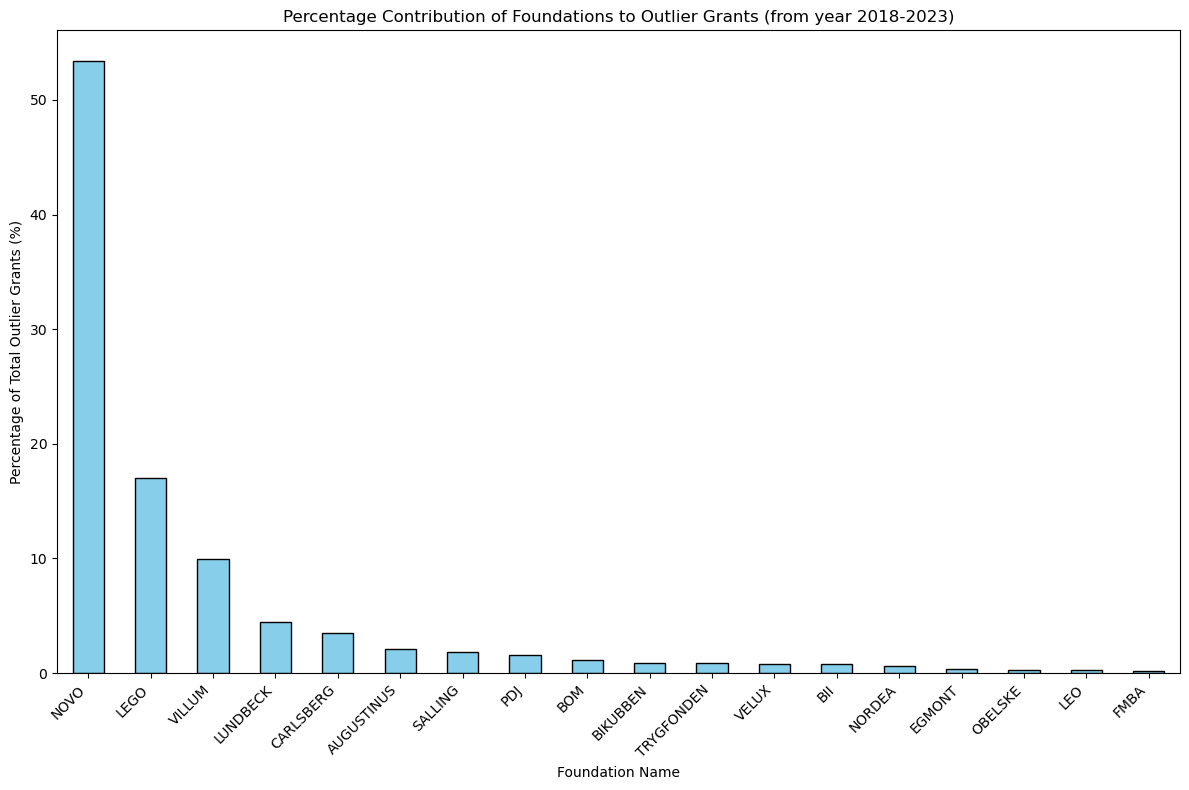

In [3]:
#data combiner translater document
import pandas as pd
import numpy as np
import re as re
import time
from scipy import stats
import translators as ts
from langdetect import detect
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from pandas.errors import ParserError
import scipy.stats as stats


#Part 1 - function call

def convert_grant_size(value):
    """
    This function converts different strings with short for mio (danish for million DKK) and tkr 
    (danish for thousand DKK). Into format that can be convertet to integers
    
    input:
    String with grant size DKK
    
    """
    if isinstance(value, str) and value.endswith("mio. kr."):
        new_value = value.strip("mio. kr.")
        new_value = float(new_value.replace(",", "."))
        return round(new_value * 1000000)
    elif isinstance(value, str) and value.endswith(" tkr."):
        new_value = value.strip("tkr.")
        new_value = float(new_value.replace(",", "."))
        return round(new_value * 1000)
    return value

def convert_grant_size2(value):
    """
    This function converts different strings with short for mio kr. (danish for million DKK),
    into format that can be convertet to integers
    
    input:
    String with grant size DKK
    
    """
    if isinstance(value, str) and value.endswith("mio. kr."):
        new_value = value.strip("mio. kr.")
        new_value = float(new_value.replace(",", "."))
        return round(new_value * 1000000)
    elif isinstance(value, str) and value.endswith("kr."):
        new_value = value.strip("kr.")
        new_value = float(new_value.replace(",", "."))
        return round(new_value * 1000)
    return value

def merge_groups(df, column, merge_dict):
    """
    This function merges specified group names into a single target name in a DataFrame column
    
    Input:
    df: the dataFrame
    column: the column where the groups are located in the dataframe
    merge_dict: a dictionary where keys are lists of group names to be merged, and values are the target names.

    """
    for t_name, groups_for_merge in merge_dict.items():
        df[column] = df[column].replace(groups_for_merge, t_name)
    return df

def fun_remove_lines(column):
    """
    Identifying rows where data is missing or invalid
    
    Input:
    column: the target column.
    """
    mask = ~column.isna() & (column != "#NA") & (column != "Årstal") & (column.astype(str).str.strip() != "")
    return mask

def higher_remove_function(amount, year, receiver_1, receiver_name, receiver_title, receiver_inst, descr, title):

    """
    This function incorporates the mask from remove_lines function, and keep lines that have documented:
    1. Grant size 
    2. year
    
    it returns two lists, of kept (keep_lines) and removed lines (remove_lines)
    """
    
    amount_mask = fun_remove_lines(amount)
    year_mask = fun_remove_lines(year)
    rec_mask = fun_remove_lines(receiver_1)
    rec_name_mask = fun_remove_lines(receiver_name)
    rec_title_mask = fun_remove_lines(receiver_title)
    rec_inst_mask = fun_remove_lines(receiver_inst)
    descrip_mask = fun_remove_lines(descr)
    title_mask = fun_remove_lines(title)
    
    grant_condition = amount_mask & year_mask
    
    keep_mask = grant_condition
    keep_lines = list(keep_mask[keep_mask].index)  #keeping
    remove_lines = list(keep_mask[~keep_mask].index)  #removing
    
    return keep_lines, remove_lines


def valuta_conv(string):
    """
    This function convert currencies EUR, USD or AUD into DKK, according to Xe Currency Data, and  
    returns the converted currency rounded to the closest integer
    
    source:
    https://www.xe.com/
    (retrieved: tuesday 5. november 13:08, 2024)
    © 1995-2024 XE.com Inc.
    """
    
    if "EUR" in string:
        eu_number = re.findall(r'\d+', string)
        eu_number = float("".join(eu_number))
        money = eu_number * 7.46
    elif "USD" in string:
        us_number = re.findall(r'\d+', string)
        us_number = float("".join(us_number))
        money = us_number * 6.84
    elif "AUD" in string:
        au_number = re.findall(r'\d+', string)
        au_number = float("".join(au_number))         
        money = au_number * 4.53
    return round(money)



def grant_counter(start_year, end_year, df, text):
    
    """
    this function produces the bar plot, showing the distribution of the grant entity count pr year
    
    input:
    
    year_start: distribution start year
    year_end : distribution end year
    df : df target
    text: Title of plot
    
    """

    years = np.arange(start_year, end_year+1, 1)
    data_grant_counts = []

    for i in years:
        grouped_years = df[df[('Year')] == i] # finding the year  
        counts = grouped_years.groupby([grouped_years[('Foundation_name')], grouped_years[('Year')]])["Grant_size_(DKK)"].count()
        data_grant_counts.append(counts.sum())

    plt.bar(years, data_grant_counts)
    plt.title("Annual grant entity count")
    plt.xlabel('Year')
    plt.ylabel('Grants')
    for i, value in enumerate(data_grant_counts):
        plt.text(years[i], value, f'{value}', ha='center', va='bottom', fontsize=8)
    #plt.savefig(f"plots_2_12/number_of_grants_alldata_{text}.jpg")
    plt.show()
    return

def grant_sum_fund_sum(start_year, end_year, df, text):
    
    """
    this function produces the bar plot, showing the distribution of foundationwise contribution pr year
    
    input:
    
    year_start: distribution start year
    year_end : distribution end year
    df : df target
    text: Title of plot
    
    """
    
    years = np.arange(start_year, end_year+1, 1)
    full_data = []
    data_grant_sum = []
    data_number_of_foundations = []

    for i in years:
        grouped_years = df[df[('Year')] == i]  #Finding year 
        grouped = grouped_years.groupby([grouped_years[('Foundation_name')], grouped_years[('Year')]])["Grant_size_(DKK)"].sum()
        data_grant_sum.append(grouped.sum())
        full_data.append(grouped)
        data_number_of_foundations.append(grouped.shape[0])
        
    
    
    df = pd.DataFrame(pd.concat(full_data))
    df = df.reset_index()
    df_pivot = df.pivot(index='Year', columns='Foundation_name', values='Grant_size_(DKK)').fillna(0)
    df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20') # stacked bar chart

    #adding labels
    plt.ylabel('Grant_size_(DKK)')
    plt.title('Summed Grant Sizes pr. Year (Number of foundations in dataset)')
    axis_labels = plt.gca()  
    plt.legend(title='Foundation', bbox_to_anchor=(1.05, 1), loc='upper left')
    axis_labels.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, position: f'{x / 1e9:.0f} Billion'))

    for i, total in enumerate(data_number_of_foundations):
        bar_height = df_pivot.iloc[i].sum() / 2  #stacked bar center for position at the center of the bar
        plt.text(i, bar_height,  #position at the center of the bar
                 f'({total:,})', ha='center', va='center', fontweight='bold', color='white')

    plt.tight_layout()
    #plt.savefig(f"plots_2_12/sums_and_number_combined{text}.jpg")
    plt.show()
    return

def freeze_foundation_number(start_year, df):
    funds_in_2018 = df[df[('Year')] == start_year]  #Find year 2018
    filtered_bigger17 = df[df[('Year')] >= start_year]  #make df only for 2017 and higher
    grouped_18 = funds_in_2018.groupby([funds_in_2018[('Foundation_name')], funds_in_2018[('Year')]])["Grant_size_(DKK)"].sum().reset_index(name ='SUM')
    string_list = grouped_18["Foundation_name"].tolist()  #list of names of foundations in existance since 2018
    df_constant = filtered_bigger17[filtered_bigger17["Foundation_name"].isin(string_list)]
    print("When keeping the number of foundations in the dataset constant since 2018, these foundations are included :", string_list)
    return df_constant


def pr_foundation_grantsum(df):
    
    fund_names = df["Foundation_name"].unique()
    
    for fund_name in fund_names:
        data_grant_sum = []
        data_number_of_foundations = []
        full_data = []
        data_grant_counts = []
        i_fundnames = df[df[('Foundation_name')] == fund_name]  #Find fundname
        years = np.arange(i_fundnames["Year"].min(), i_fundnames["Year"].max()+1, 1)

        for s in years:
            grouped_years = i_fundnames[i_fundnames[('Year')] == s]  #Finding year 
            grouped = grouped_years.groupby([grouped_years[('Foundation_name')], grouped_years[('Year')]])["Grant_size_(DKK)"].sum()
            data_grant_sum.append(grouped.sum())
            counts = grouped_years.groupby([grouped_years[('Foundation_name')], grouped_years[('Year')]])["Grant_size_(DKK)"].count()
            data_grant_counts.append(counts.sum())


        plt.bar(years, data_grant_sum)
        plt.title(f"Annual grant SUM (DKK) - {fund_name}")
        plt.xlabel('Year')
        plt.ylabel('DKK')
        axis_labels = plt.gca() 
        axis_labels.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} Million'))
        axis_labels.set_xticks(years, labels=years, rotation = "vertical", fontsize=8)

        plt.show()
        


        plt.bar(years, data_grant_counts)
        plt.title(f"Annual grant entity count - {fund_name}")
        plt.xlabel('Year')
        plt.ylabel('Grants')
        for number, val in enumerate(data_grant_counts):
            plt.text(years[number], val, f'{val}', ha='center', va='bottom', fontsize=8)
        axis_setter = plt.gca()
        axis_setter.set_xticks(years, labels=years, rotation = "vertical", fontsize=8)
        plt.show()
    return

def means_and_median(start_year, end_year, df, text, text_if_outlier):
    
    years = np.arange(start_year, end_year+1, 1)

    errors = []
    medians = []
    means = []

    for year in years:
        grouped_years = df[df[('Year')] == year]
        medians.append(grouped_years["Grant_size_(DKK)"].median())
        means.append(grouped_years["Grant_size_(DKK)"].mean())
        errors.append(grouped_years["Grant_size_(DKK)"].std()/np.sqrt(len(grouped_years["Grant_size_(DKK)"])))

    bar_width = 0.35
    index = np.arange(len(years))

    fig, ax = plt.subplots()

    bars1 = ax.bar(index, medians, bar_width, label='Median Grant Size (DKK)', color='blue')
    bars2 = ax.bar(index + bar_width, means, bar_width, label='Mean Grant Size (DKK)', color='orange', yerr=errors, ecolor = "red", capsize=3)

    ax.set_xlabel('Year')
    ax.set_ylabel('Grant Size (DKK)')
    ax.set_title(f'Median and Mean Grant Sizes (M) - {text_if_outlier}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(years)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f} Million'))
    ax.legend()

    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/ 1e6:.2f}', ha='center', va='bottom')

    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/ 1e6:.2f}', ha='left', va='bottom')

    plt.tight_layout()
    #plt.savefig(f"plots_2_12/means_n_sums_{text}.jpg", bbox_inches = "tight")
    plt.show()
    
    return

def outlier_detecter(df):
    #outliers removed after defining the threshold with the upper quartile and the interquartile range: 
    #threshold = Q3+1.5*IQR
    outlier_list = []
    upper_bounds = []
    years = np.arange(2018, 2023 + 1, 1)
    non_outliers_list = [] 
    for year in years:
        grouped_years = df[df['Year'] == year]    
        Q1 = np.percentile(grouped_years["Grant_size_(DKK)"], 25, method='midpoint')
        Q3 = np.percentile(grouped_years["Grant_size_(DKK)"], 75, method='midpoint')
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR  #upper boundary
        upper_bounds.append(upper)
        non_outliers = grouped_years[grouped_years["Grant_size_(DKK)"] <= upper]  #filter out outliers
        outliers = grouped_years[grouped_years["Grant_size_(DKK)"] >= upper]  #keep outliers
        print(f"{year} - Upper Bound: {upper}, Outliers removed Count: {len(outliers)}")
        outlier_list.append(outliers)
        non_outliers_list.append(non_outliers) # Appending non-outlier data to the list
    df_no_outliers = pd.concat(non_outliers_list, ignore_index=True)  #new df without outliers
    return df_no_outliers, outlier_list


def outlier_contributer_combined(out_list, text):
    combined_outliers = pd.concat([pd.DataFrame(i) for i in out_list], ignore_index=True)
    foundation_totals = combined_outliers.groupby("Foundation_name")["Grant_size_(DKK)"].sum()
    total_outliers = foundation_totals.sum()
    foundation_percentages = (foundation_totals / total_outliers) * 100
    plt.figure(figsize=(12, 8))
    foundation_percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.title("Percentage Contribution of Foundations to Outlier Grants (from year 2018-2023)")
    plt.xlabel("Foundation Name")
    plt.ylabel("Percentage of Total Outlier Grants (%)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    #plt.savefig(f"plots_2_12/outlier_contribute_{text}_combined.jpg")
    plt.show()
    return







#Part 2 - Data processing 

# 2.1 Reading the data


file_names = [
    "all_augustinus_grant.csv", "bii_24_sep.csv", "bikubben_data.csv", "bitten_o_madsen.csv", 
    "carlsberg_data-Copy1.csv", "csv_nordea-Copy1.csv", "villum_rawdata.csv", 
    "combined_data_lego.csv", "egmont_data.csv", "fmba.csv", "leo_data.csv", "lundbeck_data.csv", 
    "novo_data_24th_sep.csv", "obelsk_data.csv", "poul_due_jensen2.csv", "salling_data.csv", 
    "trygfonden_data-Copy1.csv", "velux_data.csv"]

dataframe_names = [
    "AUGUSTINUS", "BII", "BIKUBBEN", "BOM", "CARLSBERG", "NORDEA", "VILLUM", 
    "LEGO", "EGMONT", "FMBA", "LEO", "LUNDBECK", "NOVO", "OBELSKE", "PDJ", 
    "SALLING", "TRYGFONDEN", "VELUX"]


dataframes = {} #  Dictionary with all of my dataframes


for file_name, df_name in zip(file_names, dataframe_names): #  Iterating through each entry -> loading into df
    print(f"Loading {file_name} into dataframe {df_name}")  #making sure that they have the correct name
    
    try:
        if file_name == "leo_data.csv":  #Special \t case for leo_data.csv
            df = pd.read_csv(file_name, sep="\t")
        else:
            df = pd.read_csv(file_name)  #default separator is comma
    except pd.errors.ParserError:
        try:
            df = pd.read_csv(file_name, sep=";")  #  semicolon if comma doesnt work
        except pd.errors.ParserError:
            df = pd.read_csv(file_name, sep="\t")  # tab if semicolon doesnt work
    
    dataframes[df_name] = df #Gathered data

print("Number of foundations in the dataset :", len(dataframes))  #I have 18 foundations in my dataset


#Drop all columns called "Unnamed: 0"

for key, df in dataframes.items():
    if "Unnamed: 0" in df.columns:
        dataframes[key] = df.drop(columns=["Unnamed: 0"])
        
# 2.2 modification of each columns to ensure consistent data

#--#

#AUGUSTINIUS
dataframes["AUGUSTINUS"].groupby("Project Category").size()  #checking each category to make sure no spelling mistakes cause wrong overlap
dataframes["AUGUSTINUS"]["Grant size (DKK)"] = dataframes["AUGUSTINUS"]["Grant size (DKK)"].str.replace(".", "", regex=False)
mask_cat2 = dataframes["AUGUSTINUS"]["Project Category"] == "CAT_2"  #removing lines that are actually headers
dataframes["AUGUSTINUS"] = dataframes["AUGUSTINUS"][-mask_cat2] #removing lines that are actually headers
dataframes["AUGUSTINUS"] = dataframes["AUGUSTINUS"].reset_index(drop=True)
merge_dict_kirkeværdier = {'Kirker og religiøse kulturværdier': [
        'Kirkelige og religiøse kulturværdier', 
        'Kirkelige/religiøse kulturværdier', 
        'Kirker og religiøse kulturværdier', "Kirker, instrumenter"],
                           "Internationale humanitære formål": ["nternationale humanitære indsatser"], 
                          "Kunstudstillinger og design": ["Kunstudstillnger og design"], 
                          "Forskning i kulturarv": ["Kulturarvsforskning", "Forskning i kulturarven"], 
                          "Teater og skuespil": ["Teater, skuespil", "Scenekunst"], 
                          "Skoler og universiteter": ["Skoler, universiteter", "Studieophold"],
                          "Billedkunst og kunsthåndværk": ["Billedkunst & kunsthåndværk"],
                          "Film" : ["Film, websites og podcasts"], 
                          "Musik": ["Musik og udlån af musikinstrumenter"]}                         
dataframes["AUGUSTINUS"] = merge_groups(dataframes["AUGUSTINUS"], "Project Category", merge_dict_kirkeværdier)

#--#

#CARLSBERG
dataframes["CARLSBERG"] = dataframes["CARLSBERG"].rename(columns={"Reciever": "Receiver"})
dataframes["CARLSBERG"] = dataframes["CARLSBERG"].drop(columns=(["Grant Number"]))
dataframes["CARLSBERG"]["Year"] = dataframes["CARLSBERG"]["Year"].str.strip("År\n")
dataframes["CARLSBERG"]["Year"] = dataframes["CARLSBERG"]["Year"].str.strip("År")
dataframes["CARLSBERG"]["Grant size (DKK)"] = dataframes["CARLSBERG"]["Grant size (DKK)"].str.strip("Beløb\n DKK")
dataframes["CARLSBERG"]["Grant size (DKK)"] = dataframes["CARLSBERG"]["Grant size (DKK)"].str.strip("Beløb")
dataframes["CARLSBERG"]["Grant size (DKK)"] = dataframes["CARLSBERG"]["Grant size (DKK)"].str.replace(",", "")
dataframes["CARLSBERG"]["Grant size (DKK)"] = dataframes["CARLSBERG"]["Grant size (DKK)"].astype(int)
dataframes["CARLSBERG"]["Institution"] = dataframes["CARLSBERG"]["Institution"].str.strip("Institution")
dataframes["CARLSBERG"]["Institution"] = dataframes["CARLSBERG"]["Institution"].str.strip("\n")

#--#

#LEGO
dataframes["LEGO"]  = dataframes["LEGO"].rename(columns={"Reciever": "Receiver"})

#--#

#VILLUM 
dataframes["VILLUM"]["Year"] = dataframes["VILLUM"]["Title"].str[-5:-1]  #making Year Column
years_series = dataframes["VILLUM"]["Year"].astype(int)
are_all_years = years_series.apply(lambda x: isinstance(x, int) and 1900 <= x <= 2100).all()
are_all_years  #checking if they are all years
dataframes["VILLUM"]["Title"] = dataframes["VILLUM"]["Title"].str[0:-6]  #removing year from title
dataframes["VILLUM"] = dataframes["VILLUM"].rename(columns={"Project_category": "Project Category"})
dataframes["VILLUM"] = dataframes["VILLUM"].rename(columns={"Project_subcategory": "Project Subcategory"})

#--#

#TRYGFONDEN
dataframes["TRYGFONDEN"]  = dataframes["TRYGFONDEN"].rename(columns={"Reciever": "Receiver"})
dataframes["TRYGFONDEN"]["Grant size (DKK)"] = dataframes["TRYGFONDEN"]["Grant size (DKK)"].str.strip(" kr.")
dataframes["TRYGFONDEN"]["Grant size (DKK)"] = dataframes["TRYGFONDEN"]["Grant size (DKK)"].str.replace(".", "", regex=False).str.replace(",", ".")

#--#

#NORDEA
dataframes["NORDEA"] = dataframes["NORDEA"].rename(columns={"Reciever": "Receiver"})
dataframes["NORDEA"]["Grant size (DKK)"] = dataframes["NORDEA"]["Grant size (DKK)"].str.strip(" kr.")
dataframes["NORDEA"]["Grant size (DKK)"] = dataframes["NORDEA"]["Grant size (DKK)"].str.strip("Støttet med\n")
dataframes["NORDEA"]["Grant size (DKK)"] = dataframes["NORDEA"]["Grant size (DKK)"].str.replace(".", "", regex=False).str.replace(",", ".")

#--#

#BII
dataframes["BII"] = dataframes["BII"].drop(columns=(["Grant Type"]))
dataframes["BII"] = dataframes["BII"].rename(columns={"Type": "Title"})
dataframes["BII"]["Grant size (DKK)"] = dataframes["BII"]["Grant size (DKK)"].str.replace("DKK", "")
dataframes['BII']['Grant size (DKK)'] = dataframes['BII']['Grant size (DKK)'].str.replace(".", '', regex=False)
dataframes['BII']['Grant size (DKK)'] = dataframes['BII']['Grant size (DKK)'].str.replace(',', '.', regex=False)
dataframes['BII']['Grant size (DKK)'] = pd.to_numeric(dataframes['BII']['Grant size (DKK)'], errors='coerce')
dataframes['BII']['Grant size (DKK)'] = dataframes['BII']['Grant size (DKK)'].round().astype('Int64')

#--#

#BIKKUBBEN
dataframes["BIKUBBEN"] = dataframes["BIKUBBEN"].dropna(how='all')
dataframes["BIKUBBEN"] = dataframes["BIKUBBEN"].rename(columns={"Reciever and Title": "Receiver + Title"})
dataframes["BIKUBBEN"]["Year"] = dataframes["BIKUBBEN"]["Year"].astype(int)
dataframes["BIKUBBEN"]["Grant size (DKK)"] = dataframes["BIKUBBEN"]["Grant size (DKK)"].str.strip(" kr.")
dataframes["BIKUBBEN"]["Grant size (DKK)"] = dataframes["BIKUBBEN"]["Grant size (DKK)"].str.replace(".", "", regex=False).str.replace(",", ".")

#--#

#BOM
dataframes["BOM"]["Grant size (DKK)"] = dataframes["BOM"]["Grant size (DKK)"].apply(convert_grant_size)

#--#

#Egmont
dataframes["EGMONT"]["Project Title"]= dataframes["EGMONT"]["Project Title"].str.strip("\n↓")
dataframes["EGMONT"] = dataframes["EGMONT"].rename(columns={"Project Title": "Title"})
dataframes["EGMONT"]["Grant size (DKK)"] = dataframes["EGMONT"]["Grant size (DKK)"].str.replace(".", "", regex=False).str.replace(",", ".")

#--#

#FMBA
dataframes["FMBA"] = dataframes["FMBA"].rename(columns={"Receiver / Title": "Receiver + Title"})
dataframes["FMBA"] = dataframes["FMBA"].rename(columns={"Grant Size (DKK)": "Grant size (DKK)"})

#--#

# LEO
dataframes["LEO"] = dataframes["LEO"].rename(columns={"Reciever": "Receiver"})
dataframes["LEO"] = dataframes["LEO"].rename(columns={"Location": "Country"})
dataframes["LEO"]["Year"] = dataframes["LEO"]["Year"].str.strip("Year:")
dataframes["LEO"]["Receiver"] = dataframes["LEO"]["Receiver"].str.strip("Grantee:")
dataframes["LEO"]["Grant size (DKK)"] = dataframes["LEO"]["Grant size (DKK)"].str.strip("Amount:")
dataframes["LEO"]["Grant size (DKK)"] = dataframes["LEO"]["Grant size (DKK)"].str.replace(",", "")
dataframes["LEO"]["Grant size (DKK)"] = dataframes["LEO"]["Grant size (DKK)"].str.replace("DKK ", "")
leo_usd = dataframes["LEO"]["Grant size (DKK)"].str.contains("USD", na=False)
usd_moved = dataframes["LEO"]["Grant size (DKK)"][leo_usd].str.strip("USD ")
dkk_values = (usd_moved.astype(float) * 6.68199).astype(int)  #Changing USD to DKK with currency from source[x]
dataframes["LEO"].loc[leo_usd, "Grant size (DKK)"] = dkk_values
dataframes["LEO"]["Project Category"] = dataframes["LEO"]["Project Category"].str.replace("Grant category:", "")
dataframes["LEO"]["Country"] = dataframes["LEO"]["Country"].str.replace("Geography:", "")

#--#

#LUNDBECK
zero_div = dataframes["LUNDBECK"]["Description"] == "0"
dataframes["LUNDBECK"] = dataframes["LUNDBECK"][-zero_div]  #since these are all empty fields i remove them
dataframes["LUNDBECK"] = dataframes["LUNDBECK"].dropna(subset=["Year", "Grant size (DKK)"])  #dropping entry if we don't have year or grant size
dataframes["LUNDBECK"]["Year"] = dataframes["LUNDBECK"]["Year"].astype(int)
dataframes["LUNDBECK"]["Grant size (DKK)"] = dataframes["LUNDBECK"]["Grant size (DKK)"].str.replace(".", "", regex = True)
dataframes["LUNDBECK"]["Grant size (DKK)"] = dataframes["LUNDBECK"]["Grant size (DKK)"].str.replace("DKK", "", regex = True)
dataframes["LUNDBECK"] = dataframes["LUNDBECK"].rename(columns={"Reciever": "Receiver"})
dataframes["LUNDBECK"] = dataframes["LUNDBECK"].rename(columns={"Receiver Proffession": "Receiver Profession"})

#--#

#NOVO  
dataframes["NOVO"] = dataframes["NOVO"].rename(columns={"Reciever": "Receiver Name"})
dataframes["NOVO"] = dataframes["NOVO"].rename(columns={"Receiver Proffession": "Receiver Profession"})
dataframes["NOVO"] = dataframes["NOVO"].rename(columns={"Location": "Receiver"})
dataframes["NOVO"]["Grant size (DKK)"] = dataframes["NOVO"]["Grant size (DKK)"].str.replace(".", "")
dataframes["NOVO"]["Grant size (DKK)"] = dataframes["NOVO"]["Grant size (DKK)"].str.replace("DKK", "")

#--#

#OBELSKE
dataframes["OBELSKE"]["Grant size (DKK)"] = dataframes["OBELSKE"]["Grant size (DKK)"].str.replace(".", "")

#--#

#PDJ
dataframes["PDJ"] = dataframes["PDJ"].rename(columns={"Grant Size (DKK)": "Grant size (DKK)"})
dataframes["PDJ"] = dataframes["PDJ"].rename(columns={"Category": "Project Category"})
dataframes["PDJ"]["Grant size (DKK)"] = dataframes["PDJ"]["Grant size (DKK)"]*1000

#--#

#SALLING
dataframes["SALLING"] = dataframes["SALLING"].rename(columns={"Title and Reciever": "Receiver + Title"})
dataframes["SALLING"]["Grant size (DKK)"] = dataframes["SALLING"]["Grant size (DKK)"].str.strip("Donation:")
dataframes["SALLING"]["Grant size (DKK)"] = dataframes["SALLING"]["Grant size (DKK)"].str.strip("kr.")
dataframes["SALLING"]["Grant size (DKK)"] = dataframes["SALLING"]["Grant size (DKK)"].str.replace(".", "")

#--#

#VELUX
dataframes["VELUX"]["Grant size (DKK)"] = dataframes["VELUX"]["Grant size (DKK)"].apply(convert_grant_size2)
dataframes["VELUX"] = dataframes["VELUX"].rename(columns={"Receiver Name": "Receiver"})
dataframes["VELUX"] = dataframes["VELUX"].rename(columns={"Title": "Description"})
dataframes["VELUX"]["Year"] = dataframes["VELUX"]["Description"].str.slice(-5, -1)  #making a year frame and deleting that from description
dataframes["VELUX"]["Description"] = dataframes["VELUX"]["Description"].str.slice(0, -6)


# 2.3 Testing to check and make sure that the dataset have coherrent column names 


messylist = []  # messylist: for flat list initiation 
for i in dataframes:
    messylist.append(dataframes[i].columns.tolist())
    
flat_list = [x for xs in messylist for x in xs]
cols = np.unique(flat_list, axis=0)

print("the columns in the dataset are: ", cols)

print("\n")


for foundation_name, df in dataframes.items():
    print(f"{foundation_name}: {len(df)} rows")
total_rows = sum(len(df) for df in dataframes.values())


print(f"Total rows across all dataframes: {total_rows}") # Printing the total number of rows pr foundation


#data sum up


##1

#1. Group by foundation name
#2. Group by year 
#3. For 2022, print out the total sum of grants dispursed pr. foundation and compare to statistics data. 


##2

#1. Group by foundation name
#2. Group by year 
#3. Find data for each foundation that had published data from years 2018-2022 and note down which.
#4. For years 2018-2022, print out the total sum of grants dispursed pr. foundation pr year
#3. make plot 



# Part 3


# 3.1 - combining and flatteling the dictionary of dataframes into 1 dataframe

df_big = pd.concat(dataframes, names=['Foundation_name']).reset_index()  #flattening the dictionary into dataframe
df_big = df_big.drop(columns = "level_1")
print("([number of rows],[number of columns]) : ")
print(df_big.shape)
print("\n")
print("First 5 lines of full combined dataset : \n")
df_big.head()

# 3.2 #Removing lines that don't have grant size or year written via function: higher_remove_function

am = df_big['Grant size (DKK)']
ye = df_big['Year']
re1 = df_big['Receiver']
re_n = df_big['Receiver Name']
re_t = df_big['Receiver + Title']
re_inst = df_big['Institution']
desc_i = df_big['Description']
tit_i = df_big['Title']
keeper, remover = higher_remove_function(am, ye, re1, re_n, re_t, re_inst, desc_i, tit_i)



print("Number of lines kept :", len(keeper))
print("Number of lines removed :", len(remover))


#Saving removed lines to csv and dataframe
df_big.loc[remover].to_csv('removed_rows.csv', index=True)
na_removed_df = df_big.loc[remover]  #new df
na_removed_df = na_removed_df.reset_index() 

#Saving kept lines for new dataframe

na_filtered_df = df_big.loc[keeper]  #new df
na_filtered_df = na_filtered_df.reset_index(drop = True)  #reset index (kept old index for now as new column)

na_filtered_df  #New dataframe after filtering

#Choosing those from 2022

year22 = df_big.loc[remover]["Year"] == 2022
df_big.loc[remover][year22]

#checking which grant sizes are written as strings, and handles those

indexes = []
values = []
for idx, i in enumerate(na_filtered_df[('Grant size (DKK)')]):
    if isinstance(i, str):
        try:
            integer_convert = int(i)
        except ValueError:
            print(na_filtered_df['Foundation_name'][idx])
            print(idx, i)
            indexes.append(idx)
            values.append(i)
            
#hardcoding the AUGUSTINUS grant size that is duplicated

na_filtered_df.loc[3826, ("Grant size (DKK)")] = na_filtered_df.loc[3826, ("Grant size (DKK)")] = 200000

#valuta convertion for NOVO and LEO grants written in EUR, USD or AUD. 

for num, i in enumerate(indexes):
    if num > 0:
        na_filtered_df.loc[i, ("Grant size (DKK)")] = na_filtered_df.loc[i, ("Grant size (DKK)")] = valuta_conv(values[num])

na_filtered_df[('Grant size (DKK)')] = na_filtered_df[('Grant size (DKK)')].astype(int)
print(na_filtered_df[('Grant size (DKK)')].dtypes)  #testing that grant size is an integer

#making sure year is integer as well
#pd.to_numeric(na_filtered_df['Year']).astype(int)  - error shows year written "2022.0"
print(na_filtered_df['Year'].dtypes)  #testing that year is an integer - it's not!

for idx, i in enumerate(na_filtered_df['Year']):
    if isinstance(i, str):
        stripped_data = i.strip()
        if len(stripped_data) != 4:
            cleaned_data = stripped_data.replace("2022.0", "2022")  #hardcoded
            na_filtered_df.at[idx, ('Year')] = cleaned_data
            
na_filtered_df['Year'] = pd.to_numeric(na_filtered_df['Year']).astype(int)
print(na_filtered_df['Year'].dtypes)  #testing that year is an integer - it is now!


#Negative values
below_zero = na_filtered_df["Grant size (DKK)"] < 0
na_filtered_df[below_zero]

#LEGO have withdrawels that we need to handle 

below_zero = na_filtered_df["Grant size (DKK)"] < 0
year22mask = na_filtered_df[below_zero]["Year"] == 2022
year23mask = na_filtered_df[below_zero]["Year"] == 2023

print("in 2022 LEGO withdrawed :", na_filtered_df[below_zero][year22mask]["Grant size (DKK)"].sum())
print("in 2023 LEGO withdrawed :", na_filtered_df[below_zero][year23mask]["Grant size (DKK)"].sum())


year22_or_23 = (na_filtered_df["Year"] == 2022) | (na_filtered_df["Year"] == 2023)
combined_mask = below_zero & year22_or_23

# Removing the rows!
na_filtered_df = na_filtered_df[~combined_mask]


# compare to 2022

normal_df = na_filtered_df.copy() # First I remake my filtered dataframe, to drop the multilevels
filtered_2022 = normal_df[normal_df['Year'] == 2022]  #Find year 2022
grouped = filtered_2022.groupby([filtered_2022[('Foundation_name')], filtered_2022[('Year')]])["Grant size (DKK)"].sum()
grouped
# no data from leo and FMBA in 2022 + NORDEA only has a short list from 2022 
    
# Part 4 - Graphs showing dataset tendencies 
normal_df.shape
    
normal_df = na_filtered_df.copy() # First I remake my filtered dataframe, to drop the multilevels
filtered_2022 = normal_df[normal_df['Year'] == 2022]  #Find year 2022
grouped = filtered_2022.groupby([filtered_2022[('Foundation_name')], filtered_2022[('Year')]])["Grant size (DKK)"].sum()
grouped
    
# renaming columns to avoid issues using space 
normal_df2 = normal_df.rename(columns={'Receiver Profession': "Receiver_Profession", "Receiver Name": "Receiver_Name", "Receiver + Title": "Receiver_Title", "Grant size (DKK)": "Grant_size_(DKK)", "Project Category": "Project_Category", "Project Subcategory": "Project_Subcategory"})
normal_df2.to_csv("grant_dataset_6nov_newheader.csv")


#testing 2018 to 2023
grant_counter(2018, 2023, normal_df2, "from2018")
grant_sum_fund_sum(2018, 2023, normal_df2, "from2018")
#testing 2000 to 2023
grant_counter(2000, 2023, normal_df2, "from2000")
grant_sum_fund_sum(2000, 2023, normal_df2, "from2000")


#stat_test 

#testing when keeping number of foundations constant since 2018

df_funds_constant_18 = freeze_foundation_number(2018, normal_df2)

grant_counter(2018, 2023, df_funds_constant_18, "from2018_constant")
grant_sum_fund_sum(2018, 2023, df_funds_constant_18, "from2018_constant")

#testing when keeping number of foundations constant since 2020

df_funds_constant_20 = freeze_foundation_number(2020, normal_df2)

grant_counter(2020, 2023, df_funds_constant_20, "from2020_constant")
grant_sum_fund_sum(2020, 2023, df_funds_constant_20, "from2020_constant")


#pr foundation

pr_foundation_grantsum(normal_df2)

#means and median
means_and_median(2018, 2023, normal_df2, "full_df", "All Foundations")  #total df
means_and_median(2018, 2023, df_funds_constant_18, "constant_df", "Consistent No. Foundations") #constant foundation number

#We have very skewed distributions, making it impossible to deduct anything from simple histograms

#Let's look at the upper quartile to set a meaningful threshold for upper outliers

#7x means and median - removing outliers to see if large grants are messing with the mean

print("outliers removed from df with all funds since 2018")
df_no_outliers, outlier_list = outlier_detecter(normal_df2)
print("outliers removed from df with constant fund number since 2018")
df_no_outliers_constant, outlier_list_cons = outlier_detecter(df_funds_constant_18)

means_and_median(2018, 2023, df_no_outliers, "no_outlier_full", "All foundations & outliers removed")  #total df
means_and_median(2018, 2023, df_funds_constant_18, "no_outlier_constant", "Consistent No. Foundations & outliers removed") #constant foundation number

outlier_contributer_combined(outlier_list, "all_years")
